# look into modifying the cross_channel code 

To choose track by using with referencegroundtrack instead of the bounded area method.

Ultimately one referencegroundtrack ploted multiple passes accross my area, so i abandoned using referencegroundtrack method

In [1]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, LineString
from shapely.affinity import scale
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point
from shapely.geometry import LineString
import hvplot.xarray  # noqa
import cartopy.crs as crs
import hvplot.pandas


In [8]:
path = "/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb_20200404_v2.nc"

In [9]:
ds = xr.open_dataset(path, engine="h5netcdf")

In [10]:
# convert to pandas dataframe
dd = ds.drop_dims(['poly_exponent_x','poly_exponent_y'])
df = dd.to_dataframe()
df.reset_index(inplace=True)
df = ds[["h_corr", "utc_time","h_corr_sigma","referencegroundtrack"]].to_dataframe().dropna().reset_index()

In [11]:
df

cycle_number   ref_pt      h_corr                      utc_time  \
0                 2  1544592  128.518280 2019-03-28 18:43:41.636976488   
1                 2  1544595  128.652466 2019-03-28 18:43:41.645425580   
2                 2  1544598  128.807358 2019-03-28 18:43:41.653883561   
3                 2  1544601  128.897156 2019-03-28 18:43:41.662347555   
4                 2  1544604  129.012161 2019-03-28 18:43:41.670813717   
...             ...      ...         ...                           ...   
99640             7  1546491  117.030449 2020-03-30 01:14:25.955013409   
99641             7  1546497  116.709198 2020-03-30 01:14:25.971883013   
99642             7  1546500  116.530708 2020-03-30 01:14:25.980349213   
99643             7  1546503  116.362434 2020-03-30 01:14:25.988826333   
99644             7  1546506  116.189682 2020-03-30 01:14:25.997289613   

       h_corr_sigma  referencegroundtrack  revision  version  mincycle  \
0          0.006399                  1379         1        3         1   
1          0.005647                  1379         1        3         1   
2          0.006616                  1379         1        3         1   
3          0.005276                  1379         1        3         1   
4          0.004303                  1379         1        3         1   
...             ...                   ...       ...      ...       ...   
99640      0.009289                    53         1        3         2   
99641      0.013423                    53         1        3         2   
99642      0.008729                    53         1        3         2   
99643      0.007475                    53         1        3         2   
99644      0.009469                    53         1        3         2   

       maxcycle              y              x  
0             6 -699583.943493 -397035.103531  
1             6 -699640.594545 -397048.888601  
2             6 -699697.247959 -397062.665199  
3             6 -699753.900155 -397076.445556  
4             6 -699810.552407 -397090.225651  
...         ...            ...            ...  
99640         7 -739417.903599 -402148.266844  
99641         7 -739543.126903 -402123.922284  
99642         7 -739588.474865 -402187.416464  
99643         7 -739645.382088 -402200.253058  
99644         7 -739702.474556 -402212.275051  

[99645 rows x 12 columns]

In [12]:
line_name='line7'
gdf_line7 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line6'
gdf_line6 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line5'
gdf_line5 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line4'
gdf_line4 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line3'
gdf_line3 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line2'
gdf_line2 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line1'
gdf_line1 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line0'
gdf_line0 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

In [13]:
melt_area = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/melt_area_REMA.shp')

### Plot the data in the area to see which cycles have more relevant data

### As above but with radar lines 5-7 for reference

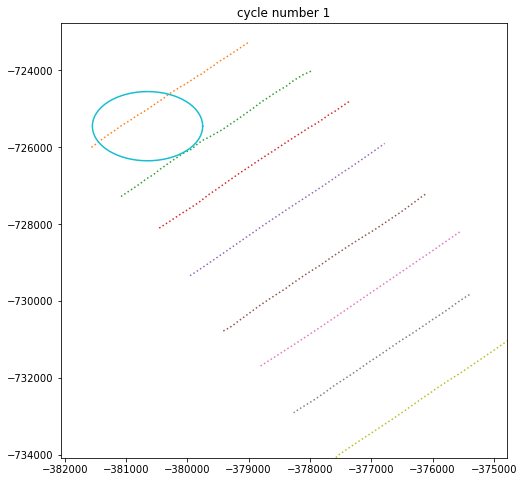

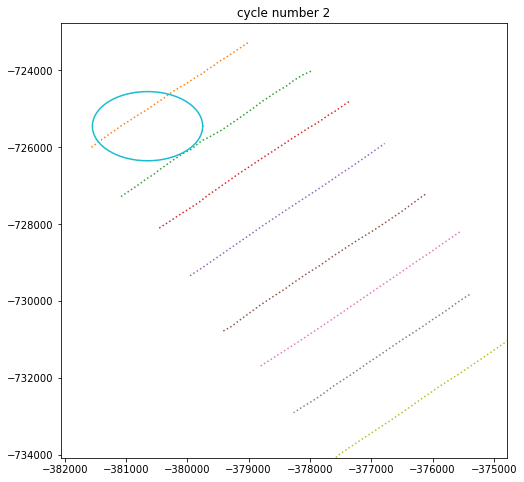

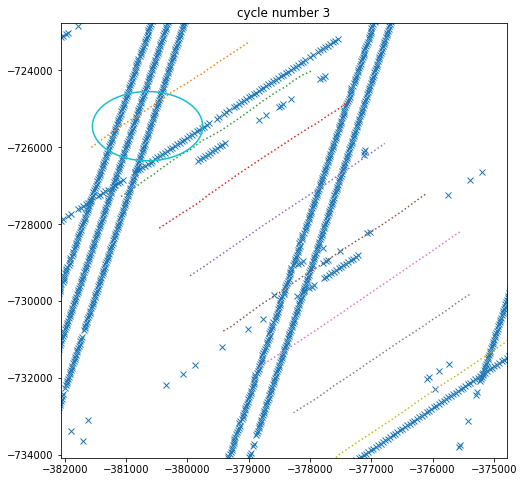

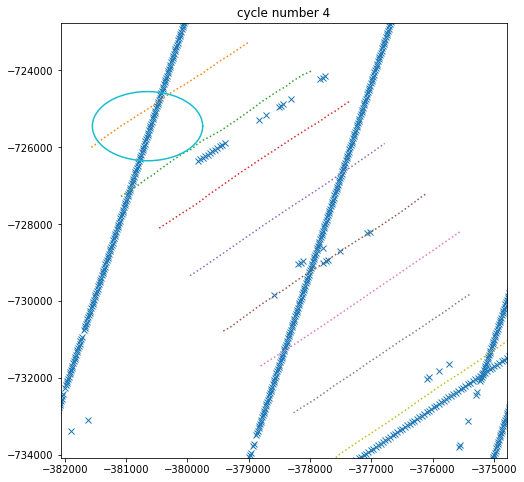

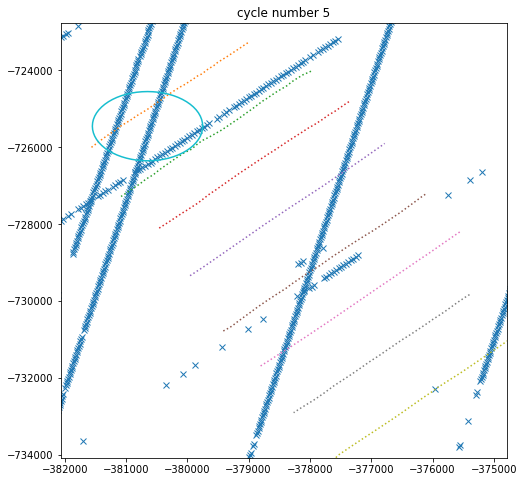

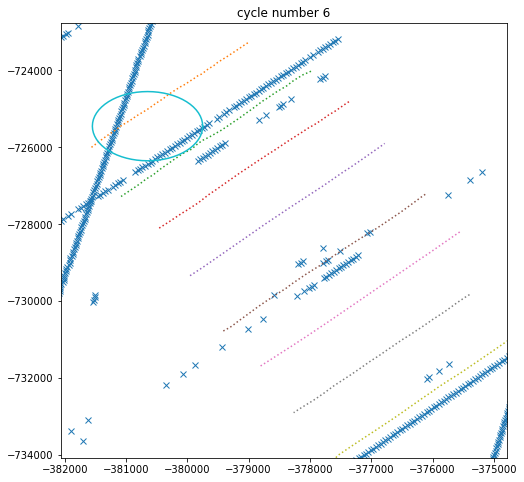

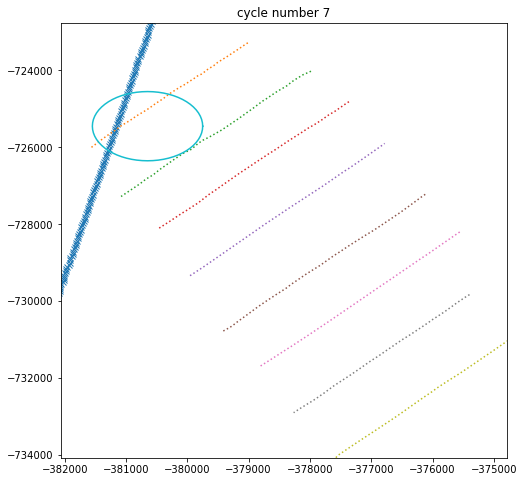

In [14]:
for cycle_number in range(1,8):

    plt.figure(figsize=(8,8))
    plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
    plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
    plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
    plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
    plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
    plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
    plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
    plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
    plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
    plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
    plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
    plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
    
    plt.title(f"cycle number {cycle_number}")

# Now see what the referencegroundtrack are
used to select lines

In [15]:
da = df.query(f"x > {gdf_line7.geometry.x.min()-500} & x < {gdf_line0.geometry.x.max()} & y > {gdf_line0.geometry.y.min()} & y < {gdf_line7.geometry.y.max()+500}")

Text(0.5, 1.0, 'cycle number 3')

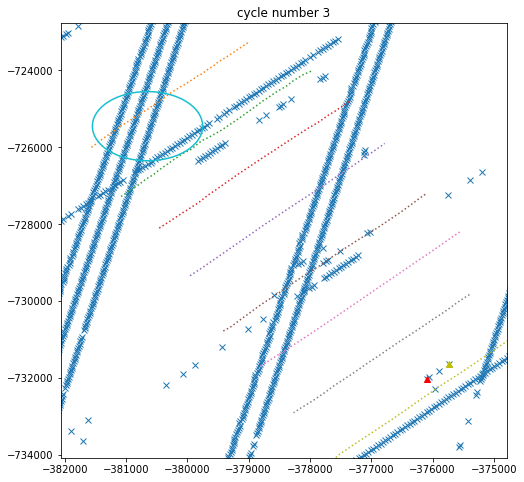

In [17]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 1131
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 1134
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

In [18]:
da.referencegroundtrack.value_counts()

617     1216
114      466
1059     343
349      303
1355     183
852      102
410       92
1120      40
1294      16
175        3
Name: referencegroundtrack, dtype: int64

In [19]:
#plot just one reference ground track
def plot_rfg(df,rfg):

    plt.figure(figsize=(8,8))
    plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
    plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
    cycle_number = 3
    plt.plot(df[df.referencegroundtrack==rfg].x,df[df.referencegroundtrack==rfg].dropna().y,'x')
    plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
    plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
    plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
    plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
    plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
    plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
    plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
    plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
    at = 1131
    plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
    at = 1134
    plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
    plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
    plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
    plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')


    plt.title(f"referencegroundtrack {rfg}")

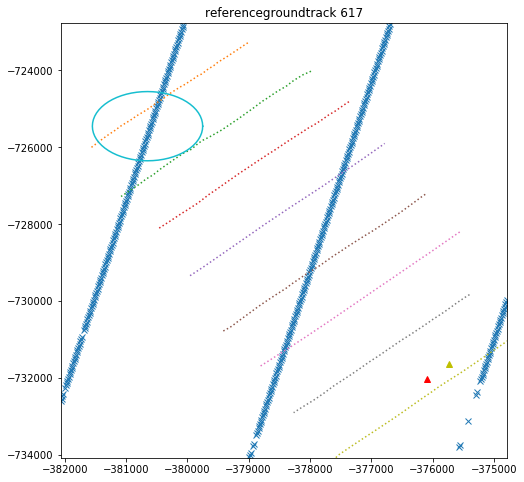

In [20]:
plot_rfg(da[da.cycle_number==3],617)

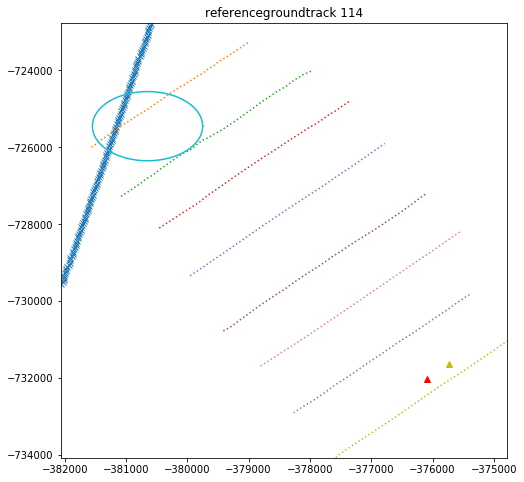

In [21]:
plot_rfg(da[da.cycle_number==3],114)

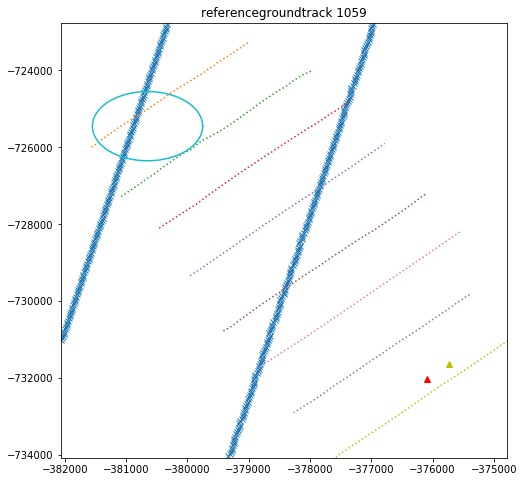

In [23]:
plot_rfg(da[da.cycle_number==3],1059)

Text(0.5, 1.0, 'cycle number 3')

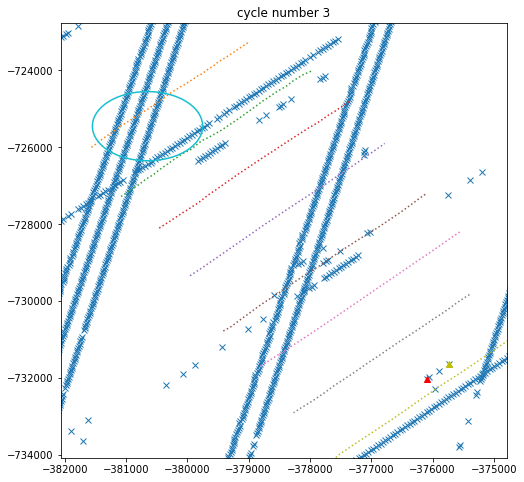

In [16]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 1131
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 1134
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

Text(0.5, 1.0, 'cycle number 3')

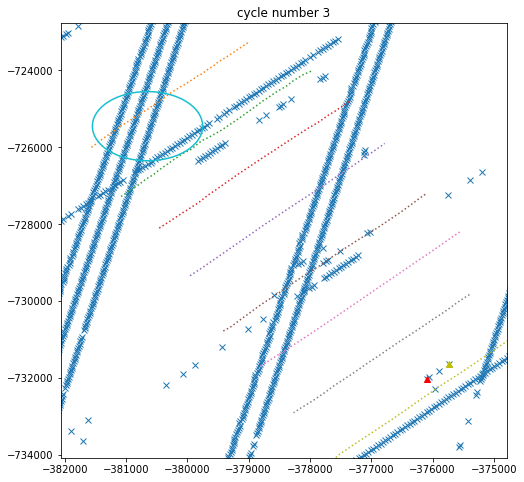

In [16]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 1131
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 1134
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

Text(0.5, 1.0, 'cycle number 3')

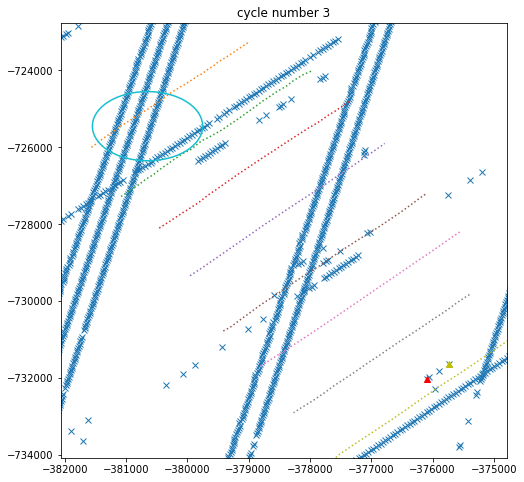

In [16]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 1131
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 1134
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

Text(0.5, 1.0, 'cycle number 3')

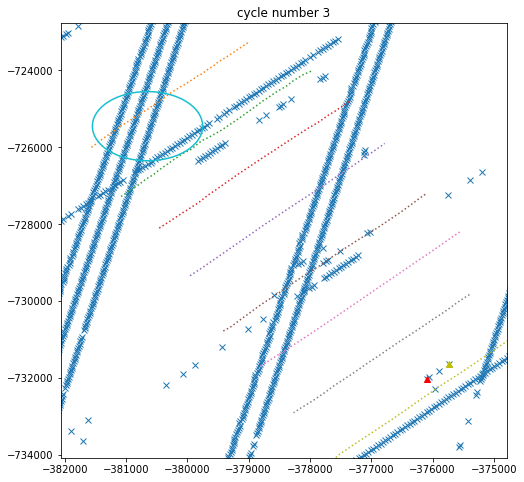

In [16]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 1131
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 1134
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

Line names, from south to north. Horizontal before diagonal. Ignoring the diagonals near radar line0

### parallel to line 0
- is0
- is1
- is2

### parallel to line 3
- is3
- is4
- is5

### crossing line 3
- is6
- is7 
- is8

### parallel to line 6
- is9
- is10 
- is11

### crossing line 6
- is12
- is13
- is14

In [11]:
is9 = LineString([(da.x.iloc[3],da.y.iloc[3]),(da.x.iloc[23],da.y.iloc[23])])
print(is9)

LINESTRING (-379830.9172270952 -726358.755056211, -377754.301185295 -724148.9706686384)


In [12]:
is4 = LineString([(da.x.iloc[24],da.y.iloc[24]),(da.x.iloc[32],da.y.iloc[32])])
print(is4)

LINESTRING (-381896.7461368341 -733380.6368849602, -377024.528257302 -728195.0649845804)


In [13]:
is3 = LineString([(da.x.iloc[33],da.y.iloc[33]),(da.x.iloc[36],da.y.iloc[36])])
print(is3)

LINESTRING (-376096.6933692924 -732027.5543375007, -375737.272743314 -731644.9631040762)


In [14]:
is11 = LineString([(da.x.iloc[41],da.y.iloc[41]),(da.x.iloc[137],da.y.iloc[137])])
print(is11)

LINESTRING (-382062.0207341266 -727907.9477563774, -377549.1232601753 -723185.2876206436)


In [15]:
is0 = LineString([(da.x.iloc[138],da.y.iloc[138]),(da.x.iloc[198],da.y.iloc[198])])
print(is0)

LINESTRING (-377164.7979570718 -734049.2067410639, -374791.4999125675 -731478.0037744837)


In [16]:
is8 = LineString([(da.x.iloc[199],da.y.iloc[199]),(da.x.iloc[396],da.y.iloc[396])])
print(is8)

LINESTRING (-376974.9258506759 -722791.6817553517, -379329.5927148979 -734035.883147971)


In [17]:
is13 = LineString([(da.x.iloc[397],da.y.iloc[397]),(da.x.iloc[541],da.y.iloc[541])])
print(is13)

LINESTRING (-380331.1736181656 -722803.0102771204, -382053.63229378 -731022.4492230047)


In [18]:
is14 = LineString([(da.x.iloc[542],da.y.iloc[542]),(da.x.iloc[661],da.y.iloc[661])])
print(is14)

LINESTRING (-380587.3777984626 -722783.2054143124, -382058.8039400483 -729564.8165617182)


In [19]:
is5 = LineString([(da.x.iloc[662],da.y.iloc[662]),(da.x.iloc[665],da.y.iloc[665])])
print(is5)

LINESTRING (-378187.3930402951 -729042.2059732673, -377786.1458335032 -728618.909909106)


In [20]:
is3 = LineString([(da.x.iloc[666],da.y.iloc[666]),(da.x.iloc[695],da.y.iloc[695])])
print(is3)

LINESTRING (-381706.7103145397 -733633.1081130945, -375189.2166156959 -726633.5887804579)


In [21]:
is7 = LineString([(da.x.iloc[740],da.y.iloc[740]),(da.x.iloc[932],da.y.iloc[932])])
print(is7)

LINESTRING (-376691.5694304057 -722796.118348052, -378990.8284925717 -734052.5693451025)


In [22]:
is12 = LineString([(da.x.iloc[933],da.y.iloc[933]),(da.x.iloc[1100],da.y.iloc[1100])])
print(is12)

LINESTRING (-380065.9441702637 -722818.7788760758, -382061.9004570942 -732590.3699018088)


In [23]:
is9 = LineString([(da.x.iloc[1101],da.y.iloc[1101]),(da.x.iloc[1121],da.y.iloc[1121])])
print(is9)

LINESTRING (-379830.9172270952 -726358.755056211, -377754.301185295 -724148.9706686384)


In [24]:
is4 = LineString([(da.x.iloc[1122],da.y.iloc[1122]),(da.x.iloc[1130],da.y.iloc[1130])])
print(is4)

LINESTRING (-381896.7461368341 -733380.6368849602, -377024.528257302 -728195.0649845804)


In [25]:
is2 = LineString([(da.x.iloc[1131],da.y.iloc[1131]),(da.x.iloc[1134],da.y.iloc[1134])])
print(is2)

LINESTRING (-376096.6933692924 -732027.5543375007, -375737.272743314 -731644.9631040762)


In [26]:
is_lines = {'is0': LineString([(-377164.7979570718, -734049.2067410639),(-374791.4999125675, -731478.0037744837)]),
           'is1': LineString([(-381896.7461368341, -733380.6368849602),(-377024.528257302, -728195.0649845804)]),
           'is3': LineString([(-376096.6933692924, -732027.5543375007), (-375737.272743314, -731644.9631040762)]),
           'is4': LineString([(-381896.7461368341, -733380.6368849602), ( -377024.528257302, -728195.0649845804)]),
           'is5': LineString([(-380587.3777984626, -722783.2054143124), ( -382058.8039400483, -729564.8165617182)]),
           'is7': LineString([(-376691.5694304057, -722796.118348052), ( -378990.8284925717, -734052.5693451025)]),
           'is8': LineString([(-376974.9258506759, -722791.6817553517), ( -379329.5927148979, -734035.883147971)]),
           'is9': LineString([(-379830.9172270952, -726358.755056211), ( -377754.301185295, -724148.9706686384)]),
           'is11': LineString([(-376096.6933692924, -732027.5543375007), ( -375737.272743314, -731644.9631040762)]),
           'is12': LineString([(-376691.5694304057, -722796.118348052), ( -378990.8284925717, -734052.5693451025)]),
           'is13': LineString([(-380331.1736181656, -722803.0102771204), ( -382053.63229378, -731022.4492230047)]),
           'is14': LineString([(-380587.3777984626, -722783.2054143124), ( -382058.8039400483, -729564.8165617182)])}

In [27]:
iss = list(is_lines.values())

In [28]:
#actually do this with a python object class so that you dont have to reload for each df

def plot_icesat_dh(dataset_path,icesat_line,cycle_first,cycle_second):
    
    is_lines = {'is0': LineString([(-377164.7979570718, -734049.2067410639),(-374791.4999125675, -731478.0037744837)]),
           'is1': LineString([(-381896.7461368341, -733380.6368849602),(-377024.528257302, -728195.0649845804)]),
           'is3': LineString([(-376096.6933692924, -732027.5543375007), (-375737.272743314, -731644.9631040762)]),
           'is4': LineString([(-381896.7461368341, -733380.6368849602), ( -377024.528257302, -728195.0649845804)]),
           'is5': LineString([(-380587.3777984626, -722783.2054143124), ( -382058.8039400483, -729564.8165617182)]),
           'is7': LineString([(-376691.5694304057, -722796.118348052), ( -378990.8284925717, -734052.5693451025)]),
           'is8': LineString([(-376974.9258506759, -722791.6817553517), ( -379329.5927148979, -734035.883147971)]),
           'is9': LineString([(-379830.9172270952, -726358.755056211), ( -377754.301185295, -724148.9706686384)]),
           'is11': LineString([(-376096.6933692924, -732027.5543375007), ( -375737.272743314, -731644.9631040762)]),
           'is12': LineString([(-376691.5694304057, -722796.118348052), ( -378990.8284925717, -734052.5693451025)]),
           'is13': LineString([(-380331.1736181656, -722803.0102771204), ( -382053.63229378, -731022.4492230047)]),
           'is14': LineString([(-380587.3777984626, -722783.2054143124), ( -382058.8039400483, -729564.8165617182)])}
    
    is_f = is_lines[f'is{cycle_first}']
    is_s = is_lines[f'is{cycle_second}']
    
    ds = xr.open_dataset(path, engine="h5netcdf") 
    

In [29]:
points = [Point(xy) for xy in zip(df.x,df.y)]
gdf = gpd.GeoDataFrame(df,geometry=points,crs=3031)

Make a buffer to select points.

Experiment with buffer values

In [30]:
gdf[gdf.cycle_number==3].geometry.intersects(is11.buffer(2)).sum()
# should be 96 long

95

In [31]:
gdf[gdf.cycle_number==3].geometry.intersects(is0.buffer(2)).sum()
# should be 60 long

61

In [32]:
gdf[gdf.cycle_number==3].geometry.intersects(is7.buffer(2)).sum()
#should be 192 long

193

a buffer of 2 seems good

In [33]:
#get the cycle numbers
gdf.cycle_number.value_counts().index.to_list()

[3, 6, 5, 4, 7, 2]

for plots, do one for each cycle number over the line

# short lines need extrapolating

Text(0.5, 1.0, 'cycle number 3')

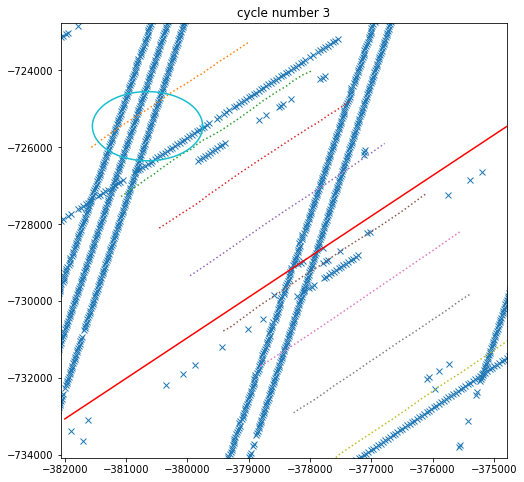

In [34]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
plt.plot(scale(is5,20,20).xy[0],scale(is5,20,20).xy[1],'r-')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

In [35]:
#so add to code

is_lines['is5'] = scale(is5,20,20)
is_lines['is4'] = scale(is4,2,2)
is_lines['is9'] = scale(is9,4,4)

Text(0.5, 1.0, 'cycle number 3')

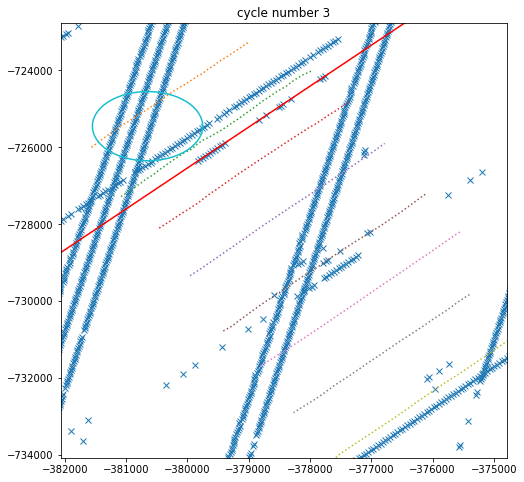

In [36]:
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
plt.plot(scale(is9,4,4).xy[0],scale(is9,4,4).xy[1],'r-')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

In [37]:
print(f"x > {gdf_line7.geometry.x.min()-500} & x < {gdf_line0.geometry.x.max()} & y > {gdf_line0.geometry.y.min()} & y < {gdf_line7.geometry.y.max()+500}")

x > -382064.5722209641 & x < -374781.1654740692 & y > -734075.0820404041 & y < -722764.4514729496
